## Laboratorio: Usos reales de la morfología matemática
### **Nombres:**  Ponce Proaño Miguel Alejandro 
### **Asignatura:**  Percepción Computacional
### **Actividad:** Nro. 3 - mia03_t10_lab.docx

# Introducción

Para el desarrollo del ejercicio se realizarán varias propuestas basadas en el uso de técnicas umbralización adaptativa más técnicas de morfología matemática, buscando devolver una imagen parecida a la que se muestra en la figura (1).
* La primera propuesta consiste en contar los objetos dentro en la imagen utilizando técnicas de morfología matemática para poder reducir esa parte colindante, y poder contar los objetos por separado.
* La segunda propuesta se tomará ventaja del poder de procesamiento de varios algoritmos que utilizaran una combinación de varias técnicas de morfología para procesar las imágenes y tratar de determinar con cuál se ha obtenido mejores resultados. 
* Finalmente utilizando el teorema de empaquetamiento de círculos, las propiedades de regiones de skimage y con el cálculo de varios radios y pesos en función de muestras tomadas de la imagen; se buscará maximizar el número de círculos contenidos en las dimensiones de la imagen.

Figura(1) Posible resultado:
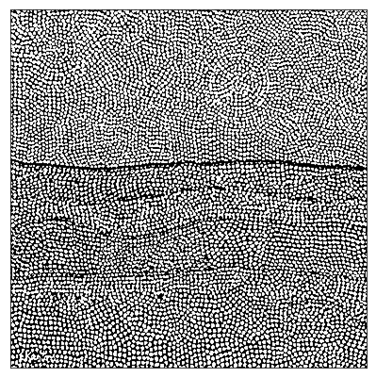

# Inicialización

In [283]:
import numpy as np
from skimage import io
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [19]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [20]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

from skimage.morphology import label
from skimage.measure import regionprops

In [21]:
from scipy import ndimage as ndi
from skimage.segmentation import clear_border

In [22]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

# Constantes

Definición de las constantes que serán utilizadas para el desarrollo del ejercicio.
* **imagenes_cercanas**: Es un diccionario que será utilizado para guardar aquellas imágenes más parecidas a la imagen objetivo.
* **n_iteraciones**: Es el número de iteraciones máximas al ejecutar los métodos de maximización de la cantidad de puntos.
* **min_area_region** y **max_area_region**: Son valores de tolerancia para filtrar aquellos objetos que son muy grandes y excluir aquellos resultados que se puedan considerar como ruido. 
* **max_top_imagenes**: Es la cantidad imágenes top que serán mostradas como resultado de varias combinaciones de la aplicación de operadores y morfologías.


In [458]:
imagenes_cercanas=dict()
n_iteraciones = 4
min_area_region = 5
max_area_region = 450
max_top_imagenes = 3

## Cargar la imagen

In [284]:
pintura_puntos = rgb2gray(io.imread(fname='img/Pintura_Puntos.jpg'))

Se muestra la imagen en blanco y negro sobre la cual se desarrollará el laboratorio.

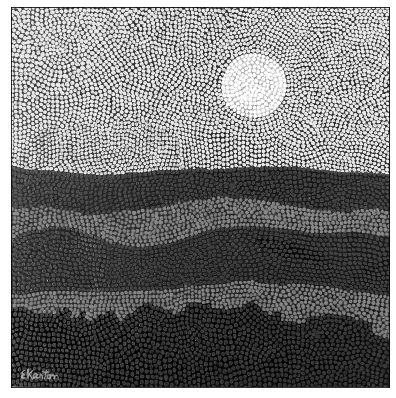

In [285]:
imshow(pintura_puntos)

# 1.- Primera propuesta

En esta propuesta se desarrollara con el siguiente procedimiento:
* Primer paso: Probar los algoritmos de umbralización que están incluidos en las librerías. 
* Segundo paso: Contar el número de círculos en la imagen resultado del paso anterior.
* Tercer paso: Utilizar morfología matemática para ver cómo varía el número de círculos detectados.


## Aplicación de varios algoritmos de umbralización

Se define la función **contar_regiones** la cual hace uso de las constantes **min_area_region** y **max_area_region**, para descartar posibles ruidos producidos u objetos muy grandes. Si los valores de las constantes son ceros, no realizara ningún filtro.

In [339]:
def contar_regiones(imagen):
    label_imagen = label(imagen,connectivity=1)    
    if min_area_region == 0 and max_area_region == 0:
        reg_props = regionprops(label_imagen)
        return len(reg_props)
    else:
        contador = 0
        for region in regionprops(label_imagen):        
            if min_area_region < region.area  and region.area< max_area_region:            
                contador += 1
        return contador

### Análisis umbral threshold_otsu

El algoritmo **threshold_otsu** se fundamenta en el método de Otsu, y es utilizado para realizar una umbralización automática la cual separa los pixeles en dos clases como son foreground y background.

Se implementa el uso del umbral **threshold_otsu**, el cual está muy lejos de la imagen objetivo ver Figura(1).

Nro. discos: 1621


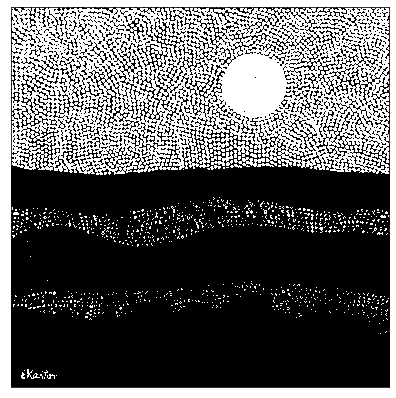

In [340]:
val_otsu = threshold_otsu(pintura_puntos)
img_otsu = pintura_puntos>val_otsu
print("Nro. círculos:",contar_regiones(img_otsu))
imshow(img_otsu)

### Análisis umbral threshold_local

Threshold_local es un algoritmo de umbral adaptativo o dinámico. El valor umbral es la media ponderada entre las vecindades locales de un píxel y esto menos una constante. Alternativamente, este umbral puede determinarse dinámicamente mediante una función determinada ya sea la media, mediana o gauss.

Se utiliza una ventana de 5 pixeles y el método basado en la media. Se implementa la función **threshold_local**, el resultado no es parecido al posible resultado. Luego se realizará una serie de pruebas actualizando los parámetros. Incluso si el número de objetos encontrados es muy alto se observar que los círculos perdieron su forma original y el resultado posiblemente es un error.

Nro. discos: 10351


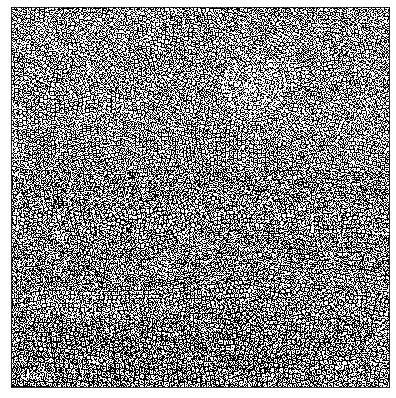

In [341]:
val_local=threshold_local(pintura_puntos, 5, 'mean')
img_local = pintura_puntos>val_local
print("Nro. círculos:",contar_regiones(img_local))
imshow(img_local)

Se modifica el parámetro de ventana para la función **threshold_local**, luego se obtiene un resultado muy parecido a la imagen objetivo ver Figura(1). El número de discos encontrados en la imagen se puede considerar representativo.

Nro. discos: 5474


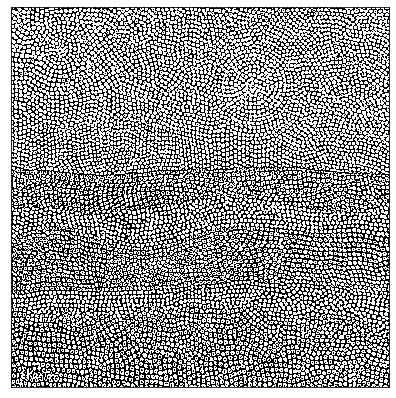

In [342]:
val_local=threshold_local(pintura_puntos, 15, 'mean')
img_local = pintura_puntos>val_local
print("Nro. círculos:",contar_regiones(img_local))
imshow(img_local)
imagenes_cercanas["threshold_local_mean-15"]=img_local

Se incrementa el parámetro de ventana para la función **threshold_local**, luego se obtiene un resultado muy parecido a la imagen objetivo ver Figura(1).

Nro. discos: 4482


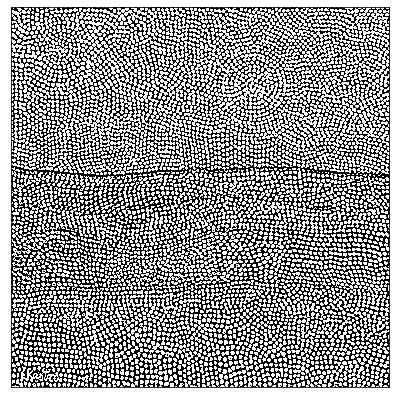

In [343]:
val_local=threshold_local(pintura_puntos, 27, 'mean')
img_local_mean = pintura_puntos>val_local
print("Nro. círculos:",contar_regiones(img_local_mean))
imshow(img_local_mean)
imagenes_cercanas["threshold_local_mean-27"]=img_local_mean

Se modifica los parámetros de ventana y método  para la función **threshold_local**, luego se obtiene un resultado parecido a la imagen objetivo ver Figura(1). El número de discos encontrados en la imagen se puede considerar representativo.

Nro. discos: 5021


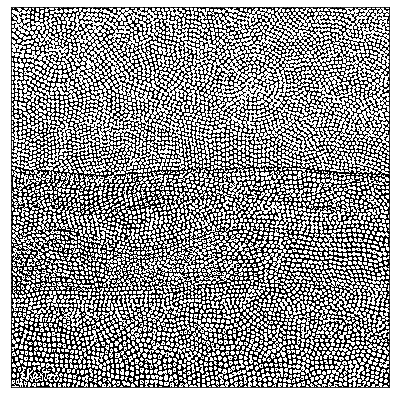

In [344]:
val_local=threshold_local(pintura_puntos, 35,  'gaussian')
img_local_gaussian = pintura_puntos>val_local
print("Nro. círculos:",contar_regiones(img_local_gaussian))
imshow(img_local_gaussian)
imagenes_cercanas["threshold_local-gaussian-35"]=img_local_gaussian

Se incrementa el parámetro de ventana y se mantiene el método de gauss para la función **threshold_local**, luego se obtiene un resultado muy parecido a la imagen objetivo ver Figura(1).

Nro. discos: 4555


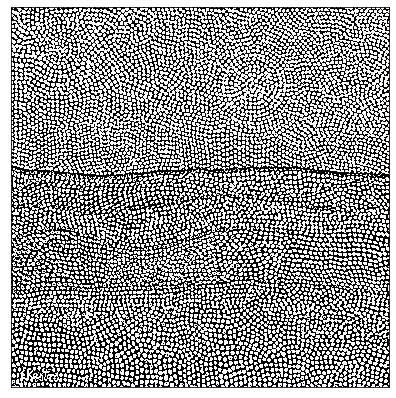

In [345]:
val_local=threshold_local(pintura_puntos, 55,  'gaussian')
img_local_gauss = pintura_puntos>val_local
print("Nro. círculos:",contar_regiones(img_local_gauss))
imshow(img_local_gauss)
imagenes_cercanas["threshold_local-gaussian-55"]=img_local_gauss

### Análisis umbral threshold_niblack

El algoritmo utiliza una función **threshold_niblack** T para cada píxel en la imagen: T = m (x, y) - k * s (x, y) donde m y s son la media y la desviación estándar de la vecindad de píxeles (x, y) y k es un parámetro configurable que pondera el efecto de la desviación estándar.

Se utiliza una ventana de 5 pixeles y el valor de k=0.8. Se implementa la función **threshold_niblack**, el resultado está muy lejos del posible resultado ver Figura(1). Luego, se realizará una serie de pruebas actualizando los parámetros.

Nro. discos: 0


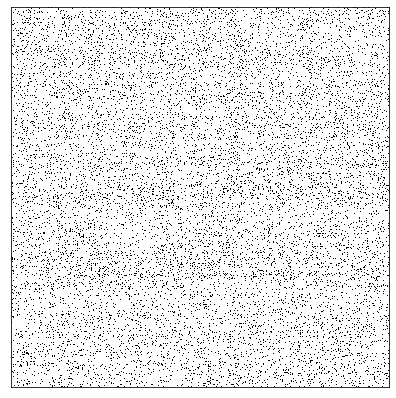

In [346]:
val_niblack=threshold_niblack(pintura_puntos, window_size=5, k=0.8)
img_niblack = pintura_puntos>val_niblack
print("Nro. círculos:",contar_regiones(img_niblack))
imshow(img_niblack)

Se modifica los parámetros de ventana y el valor k del algoritmo **threshold_niblack**, luego se obtiene un resultado que está muy lejos de la imagen objetivo ver Figura(1).

Nro. discos: 30


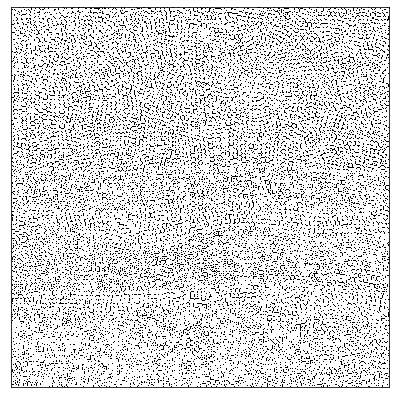

In [347]:
val_niblack=threshold_niblack(pintura_puntos, window_size=11, k=0.8)
img_niblack = pintura_puntos>val_niblack
print("Nro. círculos:",contar_regiones(img_niblack))
imshow(img_niblack)

Se optó por modificar el valor de la ventana y k, luego se obtiene un resultado parecido a la imagen objetivo ver Figura(1).

Nro. discos: 3741


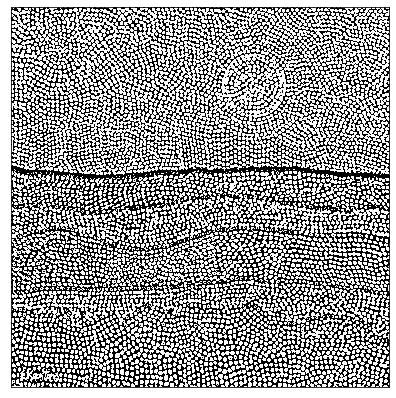

In [348]:
val_niblack=threshold_niblack(pintura_puntos, window_size=55, k=0.1)
img_niblack = pintura_puntos>val_niblack
print("Nro. círculos:",contar_regiones(img_niblack))
imshow(img_niblack)
imagenes_cercanas["threshold_niblack-55-0.1"]=img_niblack

Se modifica nuevamente los parámetros, luego el resultado es muy parecido a la imagen objetivo ver Figura(1). El número de discos encontrados en la imagen se puede considerar representativo.

Nro. discos: 4034


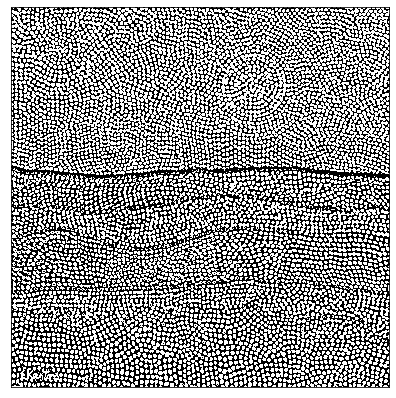

In [349]:
val_niblack=threshold_niblack(pintura_puntos, window_size=41, k=0.02)
img_niblack = pintura_puntos>val_niblack
print("Nro. círculos:",contar_regiones(img_niblack))
imshow(img_niblack)
imagenes_cercanas["threshold_niblack-41-0.02"]=img_niblack

### Análisis umbral threshold_sauvola

El algoritmo utiliza una función **threshold_niblack** T para cada píxel en la imagen: T = m(x,y) * (1 + k * ((s(x,y) / R) - 1)) donde m y s son la media y la desviación estándar de la vecindad de píxeles (x, y) y k es un parámetro configurable que pondera el efecto de la desviación estándar y R es el valor máximo de desviación estándar de la imagen.

Se utiliza una ventana = 15 pixeles y el valor de k=0.2. Se implementa la función **threshold_sauvola**, el resultado está muy lejos del posible resultado ver Figura(1). Luego, se realizará una serie de pruebas actualizando los parámetros.

Nro. discos: 2296


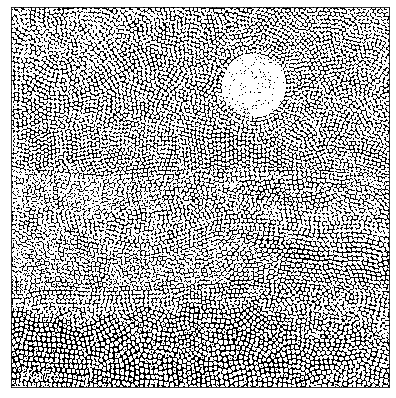

In [350]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=15, k=0.2)
img_sauvola = pintura_puntos > val_sauvola
print("Nro. círculos:",contar_regiones(img_sauvola))
imshow(img_sauvola)

Se optó por modificar el valor de la ventana y k, luego se obtiene un resultado poco parecido a la imagen objetivo ver Figura(1).

Nro. discos: 2153


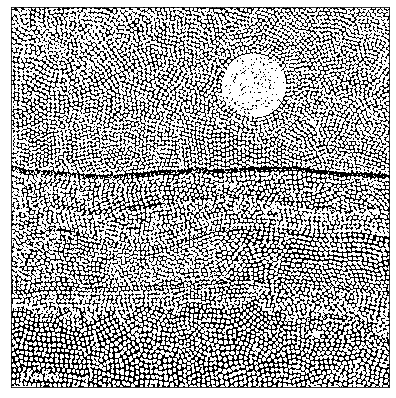

In [351]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=55, k=0.2)
img_sauvola = pintura_puntos > val_sauvola
print("Nro. círculos:",contar_regiones(img_sauvola))
imshow(img_sauvola)

Se optó por modificar el valor de la ventana y k, luego se obtiene resultado muy parecido a la imagen objetivo ver Figura(1). El número de discos encontrados en la imagen se puede considerar representativo.

Nro. discos: 4096


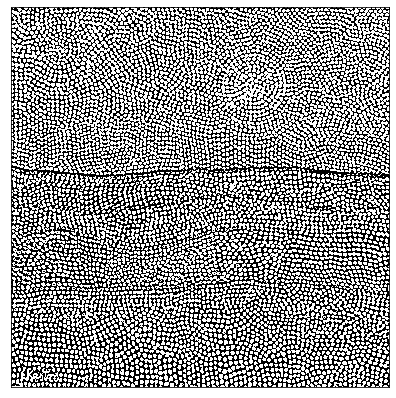

In [352]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=31, k=0.02)
img_sauvola = pintura_puntos > val_sauvola
print("Nro. círculos:",contar_regiones(img_sauvola))
imshow(img_sauvola)
imagenes_cercanas["img_sauvola-31-0.02"]=img_sauvola

# Morfología matemática

Existen diferentes **tipos de elementos estructurales** como son el disco, rectángulo, diamante. Para este laboratorio se utilizará la figura **disco**, debido a que es el elemento estructural que más se parece a la forma de las piedras.
Adicionalmente para los **diferentes operadores morfológicos** se implementará sucesivamente **discos de tamaño 1** debido a que se quiere evitar la pérdida de figuras por este proceso.
* **Nota:** Se empleará la morfología matemática únicamente sobre las imágenes que en del punto anterior que se consideraron como representativas respecto de la cantidad de discos y muy parecidas a la imagen objetivo.


## Análisis morfología imagen threshold_local

Para empezar con el procesamiento de la imagen se realiza varias erosiones de forma sucesiva y se evaluara el resultado. Con el objetivo de poder reducir la parte colindante entre las piedras, y poder contar los objetos por separado.

Nro círculos: 8115


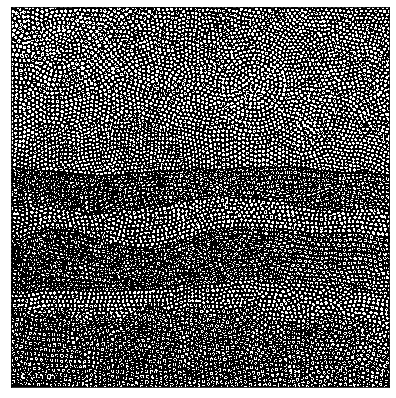

In [427]:
im_erosion1 = erosion(img_local, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
print("Nro círculos:",contar_regiones(im_erosion2))
imshow(im_erosion2)

Se realiza una erosión adicional para validar si existe un mayor número de círculos, pero como se puede observar aparecen muchos espacios vacíos por efecto de la erosión.

Nro círculos: 9626


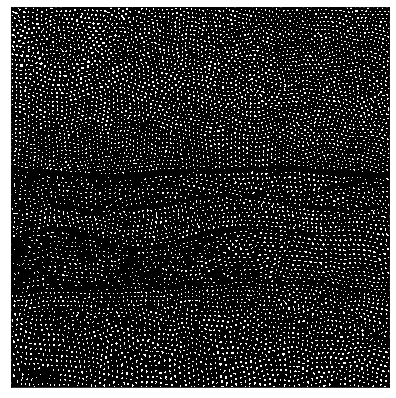

In [428]:
im_erosion3 = erosion(im_erosion2, disk(1))
print("Nro círculos:",contar_regiones(im_erosion3))
imshow(im_erosion5)

Se realizará una operación de cierre sobre la imagen erosionada 4 veces. Pero como se observa no existe ninguna mejora respecto del número de círculos.

Nro círculos: 8115


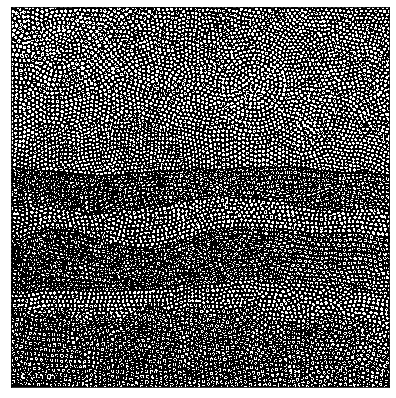

In [429]:
im_closing1 = closing(im_erosion2, disk(1))
print("Nro círculos:",contar_regiones(im_closing1))
imshow(im_closing1)

Sobre la imagen anterior se realiza una apertura ya que conserva el tamaño y las proporciones de la imagen original. En este caso incrementa el número de discos.

Nro círculos: 9543


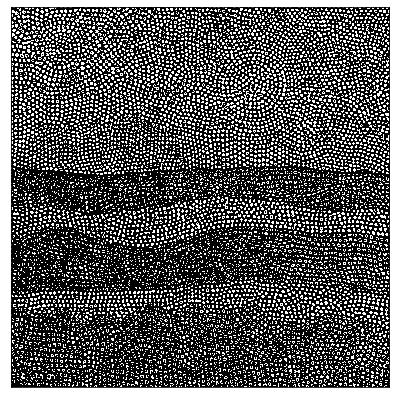

In [430]:
opening1 = opening(im_closing1, disk(1))
print("Nro círculos:",contar_regiones(opening1))
imshow(opening1)

Finalmente se llena aquellos circulo que producto de la aperutra y cierre tienes espacios vacios en el centro y por tanto lo mejor es llenarlos.

Nro círculos: 9533


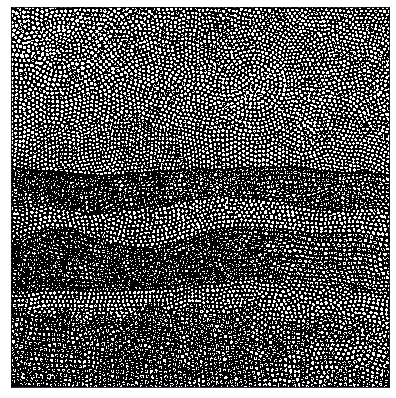

In [433]:
im_fill1 = ndi.binary_fill_holes(opening1, disk(1))
print("Nro círculos:",contar_regiones(im_fill1))
imshow(im_fill1)

Descripción del algoritmo:
 * Operar varias erosiones.
 * Aplicar acciones de apertura y clausura.
 * Cerrar los espacios vacíos.

Luego aparentemente puede existir un patrón que utilizaremos en el resto de imágenes para validar sus resultados.

## Análisis morfología imagen threshold_local método gauss

Se procesará la imagen con varias erosiones de forma sucesiva y se evaluará el resultado. Con el objetivo de poder reducir la parte colindante entre las piedras, y poder contar los objetos por separado.

Nro círculos: 7533


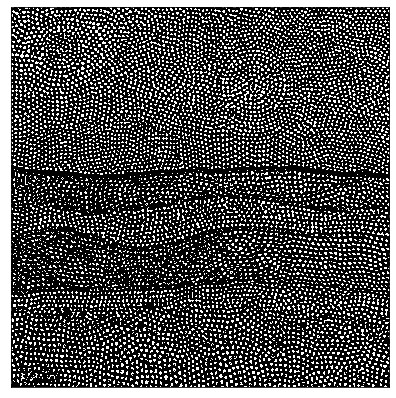

In [441]:
im_erosion1 = erosion(img_local_gauss, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
im_erosion3 = erosion(im_erosion2, disk(1))
print("Nro círculos:",contar_regiones(im_erosion3))
imshow(im_erosion3)

Se realiza una erosión adicional para validar si existe un mayor número de círculos, pero como se puede observar aparecen muchos espacios vacíos por efecto de la erosión.

Nro círculos: 7621


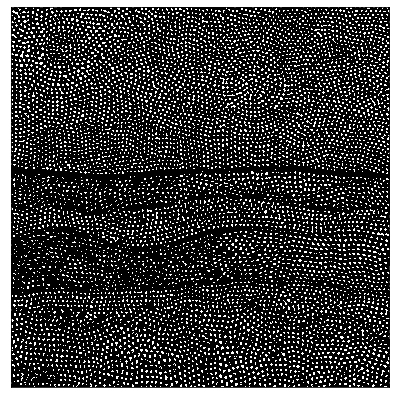

In [442]:
im_erosion4 = erosion(im_erosion3, disk(1))
print("Nro círculos:",contar_regiones(im_erosion4))
imshow(im_erosion4)

Se aplica una apertura, una clausura y un cierre de los espacios vacíos en el centro.

Nro círculos: 7287


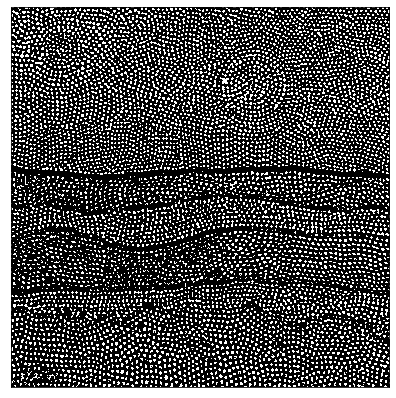

In [450]:
img_opening1 = opening(im_erosion3, disk(1))
img_closing1 = closing(img_opening1, disk(1))
img_fill1 = ndi.binary_fill_holes(img_closing1, disk(1))
print("Nro círculos:",contar_regiones(img_fill1))
imshow(img_fill1)

## Análisis morfología imagen img_niblack

Se procesará la imagen con varias erosiones de forma sucesiva y se evaluará el resultado. Con el objetivo de poder reducir la parte colindante entre las piedras, y poder contar los objetos por separado.

Nro círculos: 7400


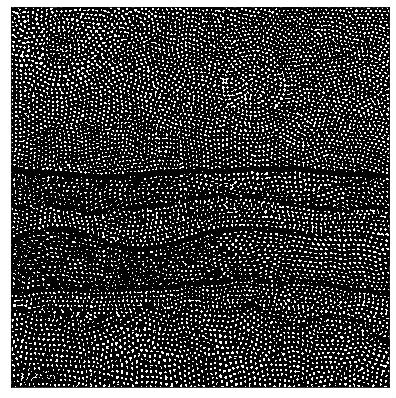

In [451]:
im_erosion1 = erosion(img_niblack, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
im_erosion3 = erosion(im_erosion2, disk(1))
im_erosion4 = erosion(im_erosion3, disk(1))
print("Nro círculos:",contar_regiones(im_erosion4))
imshow(im_erosion4)

Se aplica una apertura, una clausura y un cierre de los espacios vacíos en el centro.

Nro círculos: 7380


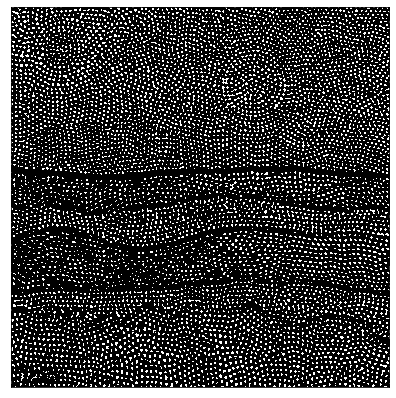

In [452]:
img_opening1 = opening(im_erosion4, disk(1))
img_closing1 = closing(img_opening1, disk(1))
img_fill1 = ndi.binary_fill_holes(img_closing1, disk(1))
print("Nro círculos:",contar_regiones(img_fill1))
imshow(img_fill1)

## Análisis morfología imagen img_sauvola

Se procesará la imagen con varias erosiones de forma sucesiva y se evaluará el resultado. Con el objetivo de poder reducir la parte colindante entre las piedras, y poder contar los objetos por separado.

Nro círculos: 7624


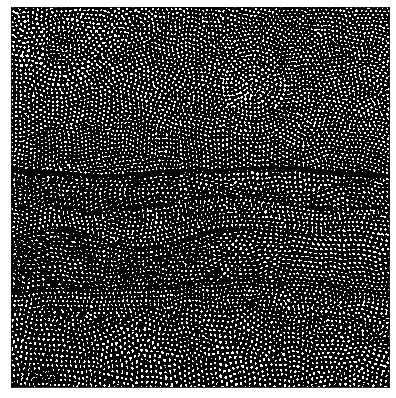

In [456]:
im_erosion1 = erosion(img_sauvola, disk(1))
im_erosion2 = erosion(im_erosion1, disk(1))
im_erosion3 = erosion(im_erosion2, disk(1))
im_erosion4 = erosion(im_erosion3, disk(1))
print("Nro círculos:",contar_regiones(im_erosion4))
imshow(im_erosion4)

Nro círculos: 7632


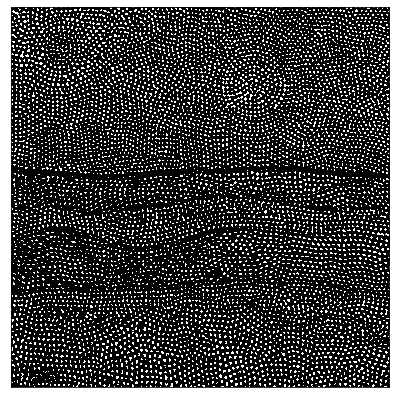

In [457]:
img_opening1 = opening(im_erosion4, disk(1))
img_closing1 = closing(img_opening1, disk(1))
img_fill1 = ndi.binary_fill_holes(img_closing1, disk(1))
print("Nro círculos:",contar_regiones(img_fill1))
imshow(img_fill1)

# 2.- Seguna propuesta - Procesamiento

En esta propuesta se desarrollará bajo los siguientes criterios:
* Se definirán funciones que se ejecutarán de forma iterativa siempre buscando maximizar el número de discos detectados, pero estos estarán sujetos a las dimensiones máximas y mínimas de las regiones detectadas. 
* Se definirá el conjunto de operadores que se ejecutar sobre estos.
* Se procesará todas las imágenes consideradas que se consideraron representativas durante la aplicación de los umbrales adaptativos.
* Se mostrará una lista con el top de imágenes detectas con la cantidad de los discos y la descripción de los algoritmos para llegar a ese resultado.


### Lista de operadores morfológicos

In [467]:
operadores = {"erosion":erosion,"apertura":opening,"cierre":closing,"relleno":ndi.binary_fill_holes,"dilatacion":dilation}

### Funciones

Definiremos la función **procesar_operador_imagen** la cual realizara la cualquier operación morfológica y cualquier elemento estructural sobre una imagen de forma iterativa. Si detecta que la cantidad de discos luego de varias erosiones sucesivas es menor se detiene.

In [473]:
def procesar_operador_imagen(imagen,ndimesion,operador=erosion,forma=disk):
    total_circulos = 0
    img_resultado = imagen
    tamanio_disco = 0
    iteracion = 0
    for n in range(1,ndimesion):        
        imagen_res = operador(img_resultado, forma(1))
        ncirculos = contar_regiones(imagen_res)
        if(ncirculos<total_circulos):
            break
        total_circulos = ncirculos           
        img_resultado = imagen_res        
        iteracion = n
    return img_resultado,ncirculos,iteracion

La función **ordenar_operadores** ordena la lista de imágenes con una operación por número de círculos de mayor a menor.

In [474]:
def ordenar_operadores(lista_imagen_operador):
    return sorted(lista_imagen_operador.items(), key=lambda x: x[1]['ndiscos'], reverse=True)

La función **maximizar_operador** obtiene la mejor operación ejecutada sobre la imagen.

In [475]:
def maximizar_operador(lista_imagen_operador):
    lista_ordenada = ordenar_operadores(lista_imagen_operador)
    return lista_ordenada[0]

La función **procesamiento_mejor_operador** en cada iteración procesara todos los operadores y los agregara a una lista. El resultado de la imagen identificada con el mayor número de círculos será utilizado como parámetro para la siguiente iteración. Esta función devuelve la imagen resultado, el número de círculos detectados y las acciones ejecutadas para llegar a ese resultado.

In [476]:
def procesamiento_mejor_operador(imagen,operadores,forma=disk):
    img_resultado = imagen
    ncirculos = 0
    acciones = {}
    nom_max_operacion = ""
    nom_ant_operacion = ""
    agregar_operacion = True
    for n in range(1,n_iteraciones):
        lista_img_operadores={} 
        agregar_operacion = True
        for nom_operador in operadores.keys():            
            operador=operadores[nom_operador]  
            if nom_operador == nom_ant_operacion:
                continue
            img,ndis,itera = procesar_operador_imagen(img_resultado,
                                                n_iteraciones,
                                                operador=operador,
                                                forma=disk)
            lista_img_operadores[nom_operador]={"ndiscos":ndis,
                                           "iteracion":itera,
                                           "operador":nom_operador,
                                           "imagen":img}    
        max_operacion = maximizar_operador(lista_img_operadores) 
        nom_max_operacion = max_operacion[0]
        if nom_ant_operacion != nom_max_operacion:
            nom_ant_operacion = nom_max_operacion
            ncirculos = max_operacion[1]['ndiscos']
            img_resultado = max_operacion[1]['imagen']
            acciones["Accion-"+str(n)] = "Operador:{0}, Iteraciones:{1}, Nro. Cirulos:{2}".format(
                max_operacion[1]['operador'],max_operacion[1]['iteracion'],max_operacion[1]['ndiscos'])
    return img_resultado,ncirculos,acciones

La función **mostar_top_imagenes** mostrará una lista con el top de imágenes detectas.

In [481]:
def mostar_top_imagenes(lista_imagenes_ordenada):
    contador = 0
    for item in lista_imagenes_ordenada:    
        nombre = item[0]       
        ncirculos = item[1]['ndiscos']
        img_resultado = item[1]['imagen']
        print('Nro. Discos: {0} Algoritmo: {1}'.format(ncirculos,nombre))
        print("Acciones:",item[1]['acciones'])
        imshow(img_resultado)    

### Ejecución del algoritmo sobre el conjunto varias imágenes.

In [482]:
for nombre_imagen in imagenes_cercanas.keys():    
    try:
        img,ndis,acciones = procesamiento_mejor_operador(imagenes_cercanas[nombre_imagen],operadores)        
        lista_algortimo_img_dicos[nombre_imagen]={"nimagen":nombre_imagen,
                                                  "ndiscos":ndis,
                                                  "acciones":acciones,
                                                  "imagen":img}
    except RuntimeError:
      print("Erro al seleccionar el tipo estructural")    

In [483]:
lista_ordenada = ordenar_operadores(lista_algortimo_img_dicos)
mostar_top_imagenes(lista_ordenada)        

In [50]:
error

NameError: name 'error' is not defined

# Buscar con imagenes de muestra

Se toma varias muestras de la imagen:
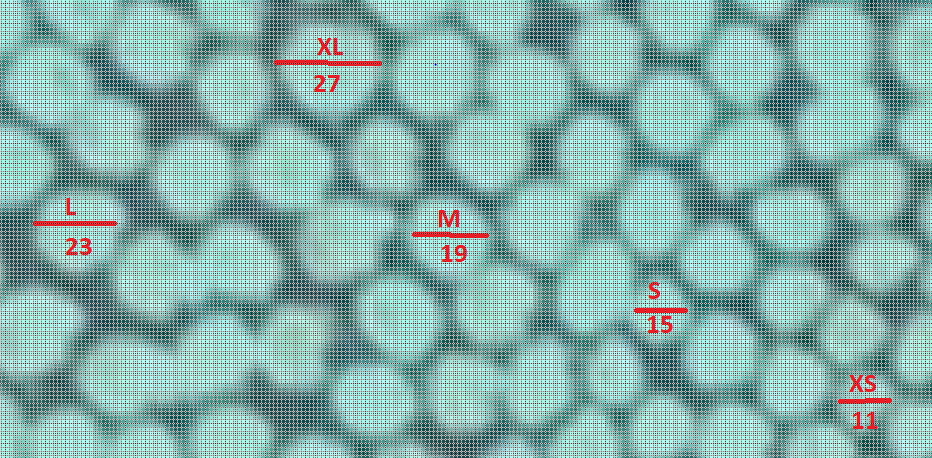

In [256]:
def calcular_radio(region):
    y0, x0 = region.centroid
    orientation = region.orientation                
    x2 = x0 - math.sin(orientation) * 0.5 * region.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * region.major_axis_length                
    radio = math.sqrt(pow(x2-x0,2)+pow(y2-y0,2))
    return radio


In [257]:
import math
tamanios={"xs":11,"s":15,"m":19,"l":23,"xl":27}
tolerancia = 4
def lista_vetanas_regiones(imagen,tamanios):    
    label_imagen = label(imagen)    
    ncirculos = 0
    totales = {}
    max_radios = {}
    for key_tam in tamanios.keys():
        totales[key_tam] = 0
        max_radios[key_tam] = 0
    for region in regionprops(label_imagen):
        for key_tam in tamanios.keys():
            tamanio = tamanios[key_tam]
            min_radio = (tamanio-tolerancia)/2
            max_radio = (tamanio+tolerancia)/2
            radio = calcular_radio(region)
            if min_radio < radio and radio<max_radio:                
                rad_tam = max_radios[key_tam]
                if(rad_tam<radio):
                    max_radios[key_tam] = radio
                totales[key_tam] = totales[key_tam] + 1
                ncirculos=ncirculos+1
                break
    pesos = {}
    for key_tam in tamanios.keys():
        pesos[key_tam] = totales[key_tam]/ncirculos    
    return ncirculos,totales,pesos,max_radios

4620 {'xs': 99, 's': 1364, 'm': 2416, 'l': 655, 'xl': 86} {'xs': 0.02142857142857143, 's': 0.29523809523809524, 'm': 0.5229437229437229, 'l': 0.14177489177489178, 'xl': 0.018614718614718615} {'xs': 7.457470461057595, 's': 9.497884793693052, 'm': 11.498405706930727, 'l': 13.491597408497546, 'xl': 15.444111534030803}


In [262]:

def generar_radios_pesos(tamanios,pesos):
    lista_radios = []
    lista_pesos = []
    for key_tam in tamanios.keys():
        radio = tamanios[key_tam]
        lista_radios.append(radio)
    for key_pes in pesos.keys():
        peso = pesos[key_pes]
        lista_pesos.append(peso)
    lista_pesos = np.array(lista_pesos)
    lista_pesos /= lista_pesos.sum()
    return lista_radios,lista_pesos
        
lista_radios,lista_pesos = generar_radios_pesos(max_radios,pesos)
print(lista_pesos.sum())
print(random.choices(lista_radios, weights=p))


1.0000000000000002
[7.499795701107983]


In [ ]:
class Circulo:
    def __init__(self, cx, cy, r, icolour=None):        
        self.cx, self.cy, self.r = cx, cy, r
        self.icolour = icolour
        
    def valida_sobre_posicion(self, cx, cy, r):
        d = np.hypot(cx-self.cx, cy-self.cy)
        return d < r + self.r
    
    def dibujar_circulo(self, fo):
        print('<circle cx="{}" cy="{}" r="{}" class="c{}"/>'
            .format(self.cx, self.cy, self.r, self.icolour), file=fo)

In [268]:
class Procesador:
    def __init__(self,n, alto, ancho,lista_radios,lista_pesos,
                 rho_min=0.005,rho_max=0.05):        
        self.alto,self.ancho = alto,ancho
        self.lista_radios = lista_radios
        self.lista_pesos = lista_pesos
        R = int(ancho/2)
        if alto<ancho:
            R = int(alto/2)        
        self.R, self.n = R, n   
        self.CX, self.CY = self.ancho // 2, self.alto // 2
        self.rmin, self.rmax = R * rho_min, R * rho_max
        self.colores = ['#993300', '#a5c916', '#00AA66', '#FF9900']

    def cabecera_imagen(self):
        print('<?xml version="1.0" encoding="utf-8"?>\n'
        '<svg xmlns="http://www.w3.org/2000/svg"\n' + ' '*5 +
          'xmlns:xlink="http://www.w3.org/1999/xlink" width="{}" height="{}" >'
                .format(self.ancho, self.alto), file=self.fo)

    def decorador(func):
        def wrapper(self):
            print("""
            <defs>
            <style type="text/css"><![CDATA[""", file=self.fo)
            func(self)
            print("""]]></style>
            </defs>""", file=self.fo)
        return wrapper

    @decorador
    def estilos_svg(self):
        print('circle {stroke: none;}', file=self.fo)
        for i, c in enumerate(self.colores):
            print('.c{} {{fill: {};}}'.format(i, c), file=self.fo)

    def crear_svg(self, nombre_archivo, *args, **kwargs):
        ncolours = len(self.colores)
        with open(nombre_archivo, 'w') as self.fo:
            self.cabecera_imagen()
            self.estilos_svg()
            for circulo in self.circulos:
                circulo.dibujar_circulo(self.fo)
            print('</svg>', file=self.fo)

    def agregar_circulo(self, r):        
        guard = 500
        while guard:            
            cr, cphi = (2 *self.R * np.sqrt(np.random.random()),
                        2 *self.R * np.random.random())
            cx, cy = cr * np.cos(cphi), cr * np.sin(cphi)            
            dimX = cx+self.CX+r
            dimY = cy+self.CY+r
            if 0<dimX<self.alto and 0<dimY<self.ancho:            
                if not any(circulo.valida_sobre_posicion(self.CX+cx, self.CY+cy, r)
                                    for circulo in self.circulos):  
                    if cx+self.CX+r>self.alto:
                        print('alto')
                    if cy+self.CY>self.ancho:
                        print('ancho')
                    circulo = Circulo(cx+self.CX, cy+self.CY, r,
                                icolour=np.random.randint(len(self.colores)))
                    self.circulos.append(circulo)
                    return
            guard -= 1
            
    def crear_circulos_aletorios(self):        
        self.circulos = []
        radios = np.random.choice(self.lista_radios,self.n,p=self.lista_pesos)
        radios[::-1].sort()        
        for radio in radios:
            self.agregar_circulo(radio)
        return len(self.circulos)


In [281]:
img,ndis,tam = procesar_operador_imagen(img_local_gauss,
                                        n_iter,
                                        operador=erosion,
                                        forma=disk)
ncirculos,totales,pesos,max_radios = lista_vetanas_regiones(img_local_gauss,tamanios)
print(ncirculos,totales,pesos,max_radios)
(alto,ancho) = pintura_puntos.shape
print("Dimensiones imagen original {0} x {1} píxeles".format(ancho,alto))
print("Radios:",lista_radios)
print("Pesos:",lista_pesos)
circles = Procesador(12500,alto,ancho,lista_radios,lista_pesos)
nciruclos = circles.crear_circulos_aletorios()
print("Nro. circulos:",nciruclos)
circles.crear_svg('circulos.svg')

Dimensiones imagen original 1920 x 1930 píxeles
Radios: [7.499795701107983, 9.497236509482565, 11.496690706585037, 13.499847632993559, 15.447464464019]
Pesos: [0.31653008 0.51105613 0.1431885  0.02304005 0.00618525]
Nro. circulos: 7204


  La resultado obtenido es el siguiente:
  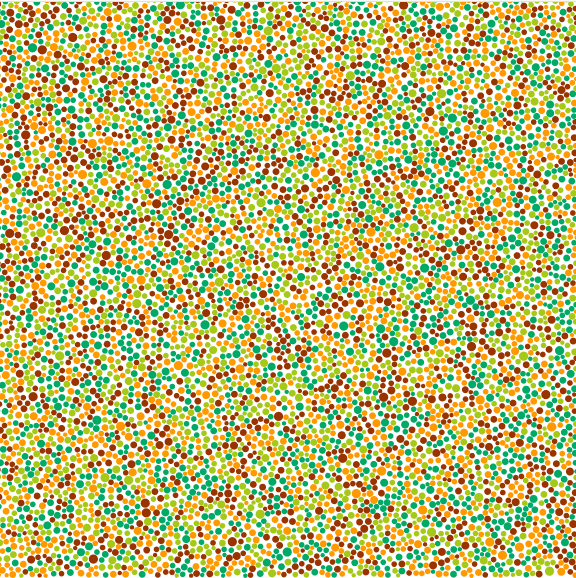

[[0.50440039 0.60581843 0.68455529 0.74059608 0.7756302  0.74817922
  0.67366941 0.5633     0.47310392 0.44368078 0.4837298  0.55710078
  0.61200275 0.71592784 0.74029059 0.74029059 0.7010749  0.62934784
  0.53130863 0.41168941 0.31812235 0.24361255 0.2001698  0.18501137
  0.20128588 0.21863882]
 [0.39569765 0.45482667 0.50891804 0.5590651  0.60305843 0.58542275
  0.5540502  0.51034745 0.49466118 0.52686706 0.59631647 0.67418235
  0.72599608 0.79828078 0.8218102  0.83749647 0.8265651  0.79098824
  0.70749647 0.58592784 0.48480039 0.38086745 0.30635765 0.24247373
  0.22873686 0.23265843]
 [0.30942314 0.32736431 0.34502275 0.3831451  0.42825451 0.44001922
  0.46412196 0.50333765 0.56494392 0.63945373 0.71339804 0.78089804
  0.82011373 0.86188196 0.8814898  0.90668588 0.91452902 0.91452902
  0.86941961 0.77808471 0.6918102  0.56323176 0.46322039 0.35341647
  0.29345412 0.26992471]
 [0.24862745 0.25452118 0.24753412 0.28480039 0.33886902 0.38650118
  0.44924627 0.54925765 0.64364314 0.7220

In [15]:
import numpy as np

class Circle:
    """A little class representing an SVG circle."""

    def __init__(self, cx, cy, r, icolour=None):
        """Initialize the circle with its centre, (cx,cy) and radius, r.

        icolour is the index of the circle's colour.

        """
        self.cx, self.cy, self.r = cx, cy, r
        self.icolour = icolour

    def overlap_with(self, cx, cy, r):
        """Does the circle overlap with another of radius r at (cx, cy)?"""

        d = np.hypot(cx-self.cx, cy-self.cy)
        return d < r + self.r

    def draw_circle(self, fo):
        """Write the circle's SVG to the output stream, fo."""

        print('<circle cx="{}" cy="{}" r="{}" class="c{}"/>'
            .format(self.cx, self.cy, self.r, self.icolour), file=fo)

class Circles:
    """A class for drawing circles-inside-a-circle."""

    def __init__(self, width=600, height=600, R=250, n=800, rho_min=0.005,
                 rho_max=0.05, colours=None):
        """Initialize the Circles object.

        width, height are the SVG canvas dimensions
        R is the radius of the large circle within which the small circles are
        to fit.
        n is the maximum number of circles to pack inside the large circle.
        rho_min is rmin/R, giving the minimum packing circle radius.
        rho_max is rmax/R, giving the maximum packing circle radius.
        colours is a list of SVG fill colour specifiers to be referenced by
            the class identifiers c<i>. If None, a default palette is set.

        """

        self.width, self.height = width, height
        self.R, self.n = R, n
        # The centre of the canvas
        self.CX, self.CY = self.width // 2, self.height // 2
        self.rmin, self.rmax = R * rho_min, R * rho_max
        self.colours = colours or ['#993300', '#a5c916', '#00AA66', '#FF9900']

    def preamble(self):
        """The usual SVG preamble, including the image size."""

        print('<?xml version="1.0" encoding="utf-8"?>\n'

        '<svg xmlns="http://www.w3.org/2000/svg"\n' + ' '*5 +
          'xmlns:xlink="http://www.w3.org/1999/xlink" width="{}" height="{}" >'
                .format(self.width, self.height), file=self.fo)

    def defs_decorator(func):
        """For convenience, wrap the CSS styles with the needed SVG tags."""

        def wrapper(self):
            print("""
            <defs>
            <style type="text/css"><![CDATA[""", file=self.fo)

            func(self)

            print("""]]></style>
            </defs>""", file=self.fo)
        return wrapper

    @defs_decorator
    def svg_styles(self):
        """Set the SVG styles: circles are coloured with no border."""

        print('circle {stroke: none;}', file=self.fo)
        for i, c in enumerate(self.colours):
            print('.c{} {{fill: {};}}'.format(i, c), file=self.fo)

    def make_svg(self, filename, *args, **kwargs):
        """Create the image as an SVG file with name filename."""

        ncolours = len(self.colours)
        with open(filename, 'w') as self.fo:
            self.preamble()
            self.svg_styles()
            for circle in self.circles:
                circle.draw_circle(self.fo)
            print('</svg>', file=self.fo)

    def _place_circle(self, r):
        # The guard number: if we don't place a circle within this number
        # of trials, we give up.
        guard = 500
        while guard:
            # Pick a random position, uniformly on the larger circle's interior
            cr, cphi = ( 2 *self.R * np.sqrt(np.random.random()),
                         2 *self.R * np.random.random() )
            cx, cy = cr * np.cos(cphi), cr * np.sin(cphi)
            #cx, cy = 2*self.R * np.sqrt(np.random.random()),2*self.R * np.sqrt(np.random.random())
            if 0<cr+r < 600:
            # The circle fits inside the larger circle.
                if not any(circle.overlap_with(self.CX+cx, self.CY+cy, r)
                                    for circle in self.circles):
                    # The circle doesn't overlap any other circle: place it.
                    circle = Circle(cx+self.CX, cy+self.CY, r,
                                icolour=np.random.randint(len(self.colours)))
                    self.circles.append(circle)
                    return
            guard -= 1
        # Warn that we reached the guard number of attempts and gave up for
        # for this circle.
        print('guard reached.')

    def make_circles(self):
        """Place the little circles inside the big one."""

        # First choose a set of n random radii and sort them. We use
        # random.random() * random.random() to favour small circles.
        self.circles = []
        r = self.rmin + (self.rmax - self.rmin) * np.random.random(
                                self.n) * np.random.random(self.n)
        r[::-1].sort()
        # Do our best to place the circles, larger ones first.
        for i in range(self.n):
            self._place_circle(r[i])

circles = Circles(n=4500)
circles.make_circles()
circles.make_svg('circles.svg')



In [2]:
import numpy as np

class Circle:
    """A little class representing an SVG circle."""

    def __init__(self, cx, cy, r, icolour=None):
        """Initialize the circle with its centre, (cx,cy) and radius, r.

        icolour is the index of the circle's colour.

        """
        self.cx, self.cy, self.r = cx, cy, r
        self.icolour = icolour

    def overlap_with(self, cx, cy, r):
        """Does the circle overlap with another of radius r at (cx, cy)?"""

        d = np.hypot(cx-self.cx, cy-self.cy)
        return d < r + self.r

    def draw_circle(self, fo):
        """Write the circle's SVG to the output stream, fo."""

        print('<circle cx="{}" cy="{}" r="{}" class="c{}"/>'
            .format(self.cx, self.cy, self.r, self.icolour), file=fo)

class Circles:
    """A class for drawing circles-inside-a-circle."""

    def __init__(self, width=600, height=600, R=250, n=800, rho_min=0.005,
                 rho_max=0.05, colours=None):
        """Initialize the Circles object.

        width, height are the SVG canvas dimensions
        R is the radius of the large circle within which the small circles are
        to fit.
        n is the maximum number of circles to pack inside the large circle.
        rho_min is rmin/R, giving the minimum packing circle radius.
        rho_max is rmax/R, giving the maximum packing circle radius.
        colours is a list of SVG fill colour specifiers to be referenced by
            the class identifiers c<i>. If None, a default palette is set.

        """

        self.width, self.height = width, height
        self.R, self.n = R, n
        # The centre of the canvas
        self.CX, self.CY = self.width // 2, self.height // 2
        self.rmin, self.rmax = R * rho_min, R * rho_max
        self.colours = colours or ['#993300', '#a5c916', '#00AA66', '#FF9900']

    def preamble(self):
        """The usual SVG preamble, including the image size."""

        print('<?xml version="1.0" encoding="utf-8"?>\n'

        '<svg xmlns="http://www.w3.org/2000/svg"\n' + ' '*5 +
          'xmlns:xlink="http://www.w3.org/1999/xlink" width="{}" height="{}" >'
                .format(self.width, self.height), file=self.fo)

    def defs_decorator(func):
        """For convenience, wrap the CSS styles with the needed SVG tags."""

        def wrapper(self):
            print("""
            <defs>
            <style type="text/css"><![CDATA[""", file=self.fo)

            func(self)

            print("""]]></style>
            </defs>""", file=self.fo)
        return wrapper

    @defs_decorator
    def svg_styles(self):
        """Set the SVG styles: circles are coloured with no border."""

        print('circle {stroke: none;}', file=self.fo)
        for i, c in enumerate(self.colours):
            print('.c{} {{fill: {};}}'.format(i, c), file=self.fo)

    def make_svg(self, filename, *args, **kwargs):
        """Create the image as an SVG file with name filename."""

        ncolours = len(self.colours)
        with open(filename, 'w') as self.fo:
            self.preamble()
            self.svg_styles()
            for circle in self.circles:
                circle.draw_circle(self.fo)
            print('</svg>', file=self.fo)

    def _place_circle(self, r):
        # The guard number: if we don't place a circle within this number
        # of trials, we give up.
        guard = 500
        while guard:
            # Pick a random position, uniformly on the larger circle's interior
            cr, cphi = ( self.R * np.sqrt(np.random.random()),
                         2*np.pi * np.random.random() )
            cx, cy = cr * np.cos(cphi), cr * np.sin(cphi)
            if cr+r < self.R:
            # The circle fits inside the larger circle.
                if not any(circle.overlap_with(self.CX+cx, self.CY+cy, r)
                                    for circle in self.circles):
                    # The circle doesn't overlap any other circle: place it.
                    circle = Circle(cx+self.CX, cy+self.CY, r,
                                icolour=np.random.randint(len(self.colours)))
                    self.circles.append(circle)
                    return
            guard -= 1
        # Warn that we reached the guard number of attempts and gave up for
        # for this circle.
        print('guard reached.')

    def make_circles(self):
        """Place the little circles inside the big one."""

        # First choose a set of n random radii and sort them. We use
        # random.random() * random.random() to favour small circles.
        self.circles = []
        r = self.rmin + (self.rmax - self.rmin) * np.random.random(
                                self.n) * np.random.random(self.n)
        r[::-1].sort()
        # Do our best to place the circles, larger ones first.
        for i in range(self.n):
            self._place_circle(r[i])

circles = Circles(n=2000)
circles.make_circles()
circles.make_svg('circles.svg')


guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
guard reached.
